In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**<h3> List of Indicators used</h3>**

**<h4> Poverty </h4>**

1. Gini Index

2. Poverty Wealth Gap percentages below the following poverty lines
    * at $2.15 a day
    * at $3.65 a day
    * at $6.85 a day
    
3. Poverty Headcount percentages on the following poverty lines
    * at $2.15 a day
    * at $3.65 a day
    * at $6.85 a day

**<h4> Health </h4>**

4. Life Expectancy
5. Number of physicians per 1000 people
6. Number of hospital beds per 1000 people 
7. Cause of death (% of total)
    * by non-communicable diseases
    * by injury
8. Population ages 65 and above (% of total population)

**<h4>Education</h4>**

9. Percentage of population ages 25+ who have completed the following
    * Short-cycle tertiary
    * primary
    * lower secondary
    * Atleast Master's or equivalent
    * Atleast Doctoral or equivalent

**<h4>Economy</h4>**

10. GDP (current USD)

11. Unemployment

12. Inflation

13. Population



In [2]:
df = pd.read_csv('../data/interim/radius3.csv',index_col=[0]).reset_index(drop=True)

df.head()

,Country Name,Year,"Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)","Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)",Poverty headcount ratio at $3.65 a day (2017 PPP) (% of population),"Inflation, consumer prices (annual %)",Poverty headcount ratio at $6.85 a day (2017 PPP) (% of population),Gini index,GDP (current US$),Poverty gap at $2.15 a day (2017 PPP) (%),...,"Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)","Population, total",Population ages 65 and above (% of total population),"Cause of death, by non-communicable diseases (% of total)","Unemployment, total (% of total labor force) (modeled ILO estimate)",Poverty gap at $6.85 a day (2017 PPP) (%),"Hospital beds (per 1,000 people)","Life expectancy at birth, total (years)","Physicians (per 1,000 people)","Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)"
0,Ukraine,2002,88.543221,0.00000,17.0,0.757421,61.9,29.0,4.395616e+10,0.5,...,38.141708,48202470.0,14.729277,88.035103,10.140,20.8,8.89,68.275610,3.0188,97.182564
1,Ukraine,2003,88.543221,0.00000,10.4,5.179678,54.1,28.7,5.201035e+10,0.2,...,38.141708,47812949.0,15.275937,88.035103,9.060,16.0,8.81,68.210732,3.0096,97.182564
2,Kyrgyz Republic,2007,95.692841,0.03193,33.6,10.230103,74.2,33.9,3.802571e+09,1.7,...,17.622650,5268400.0,5.029892,76.941210,2.677,31.8,5.06,67.895122,2.3580,97.972107
3,Panama,2007,61.490292,0.25529,14.9,4.168633,30.5,52.7,2.129598e+10,2.2,...,21.358910,3431614.0,5.989718,69.875419,5.844,13.6,2.30,76.154000,1.3032,82.629356
4,Kyrgyz Republic,2008,95.692841,0.03193,22.7,24.520102,67.6,31.5,5.139959e+09,0.6,...,17.622650,5318700.0,4.795128,76.941210,2.770,25.0,5.01,68.451220,2.3528,97.972107


In [3]:
df['GDP per capita'] = df['GDP (current US$)'] / df['Population, total']

In [4]:
df.corr(numeric_only=True).to_csv('../reports/figures/edacorr.csv')

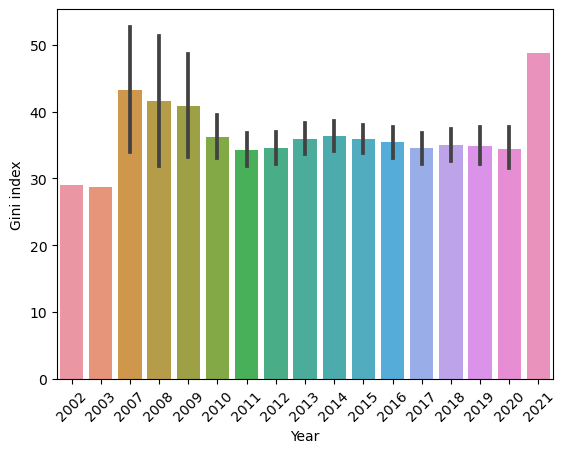

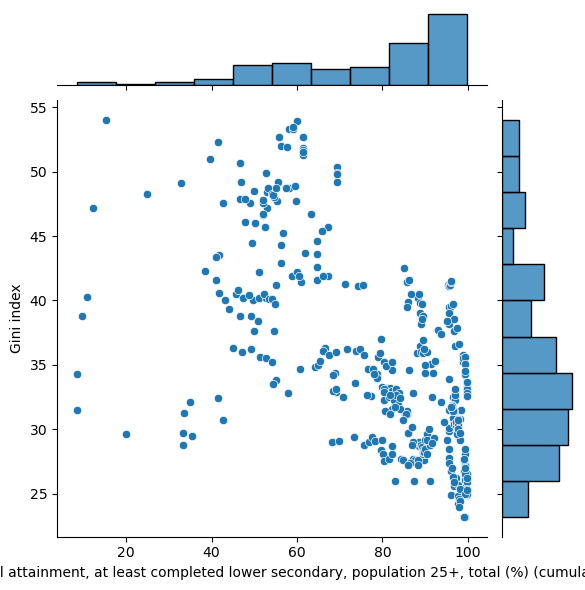

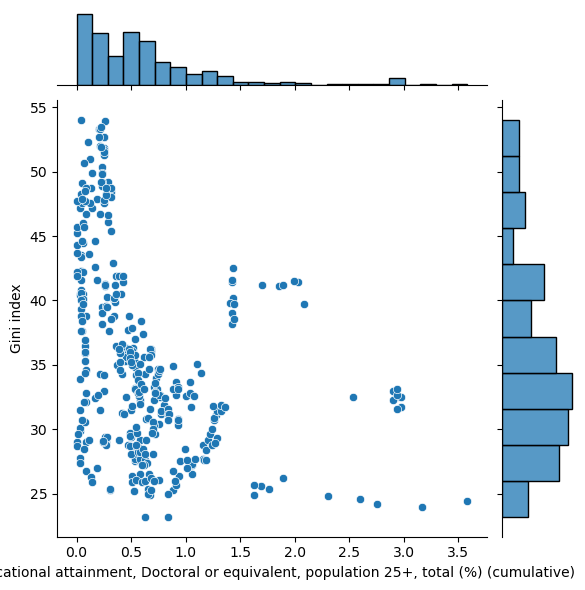

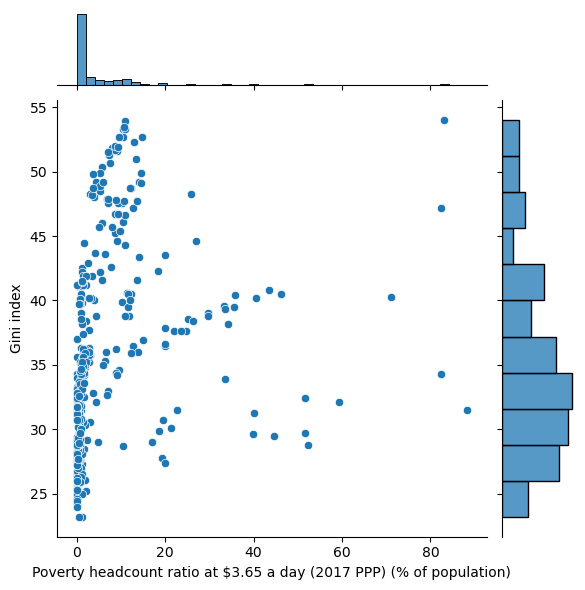

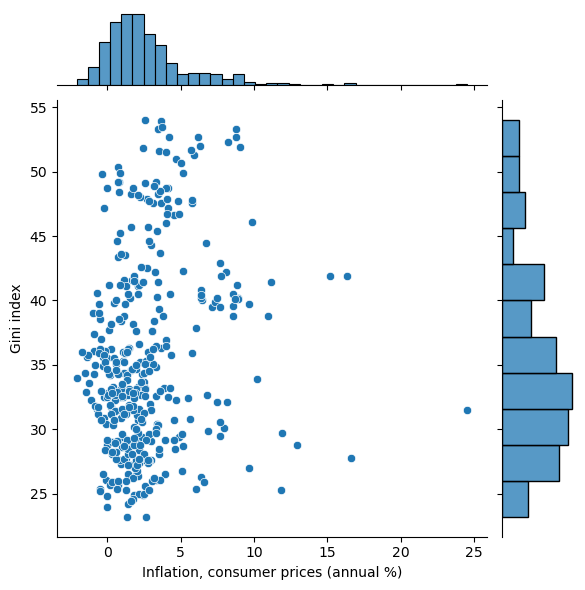

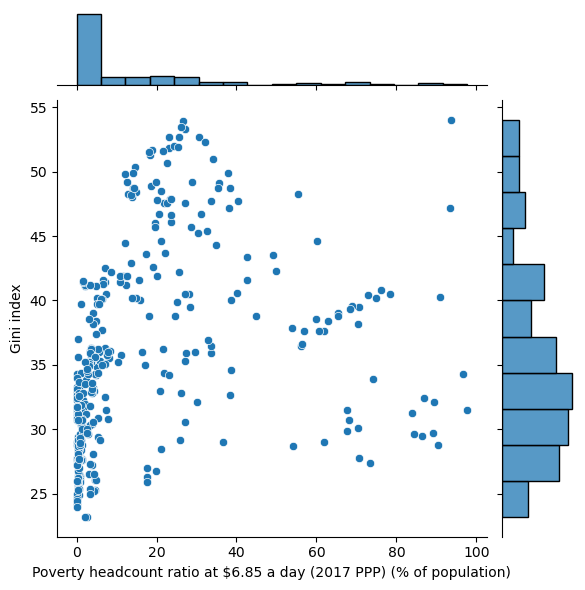

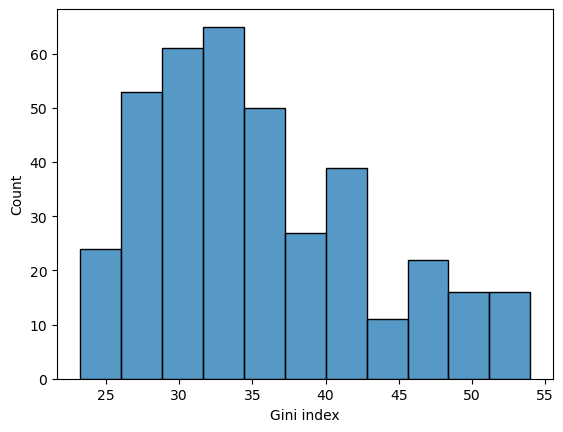

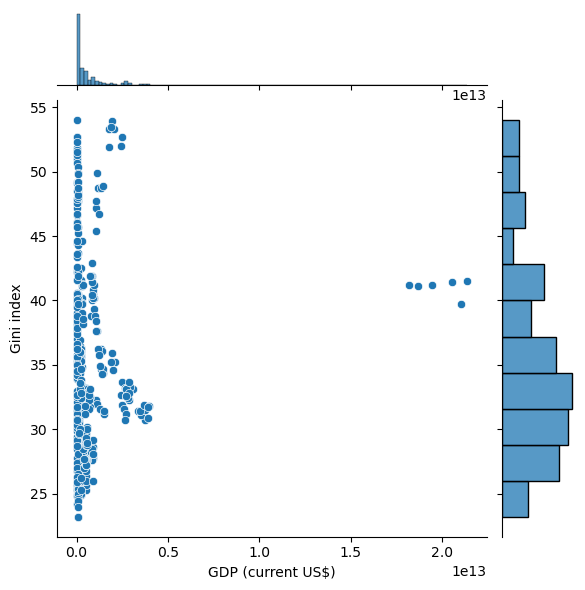

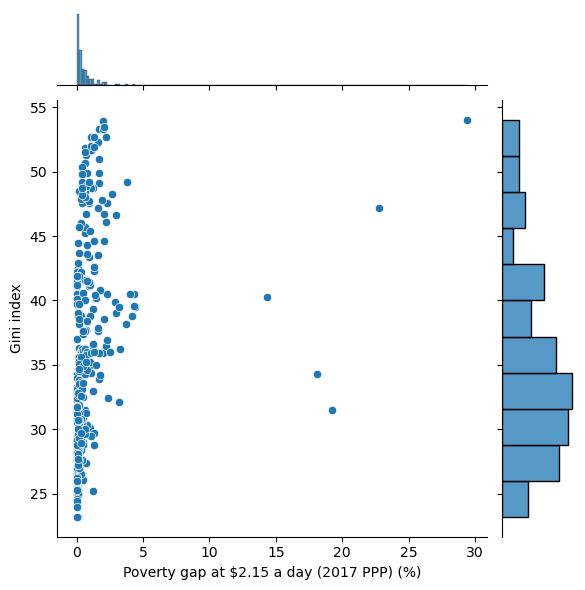

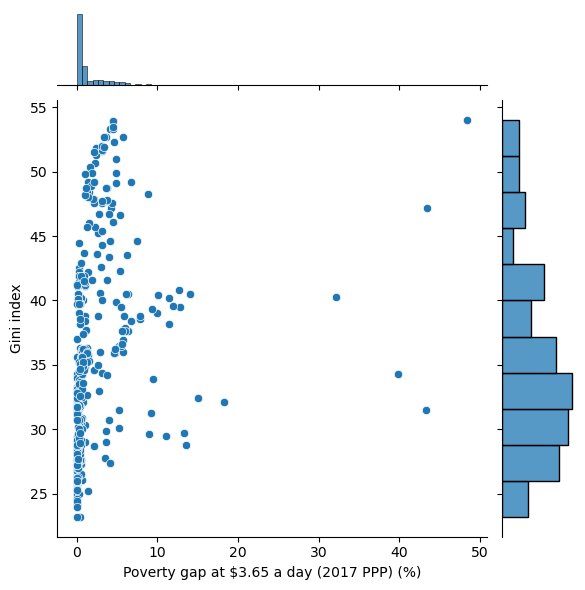

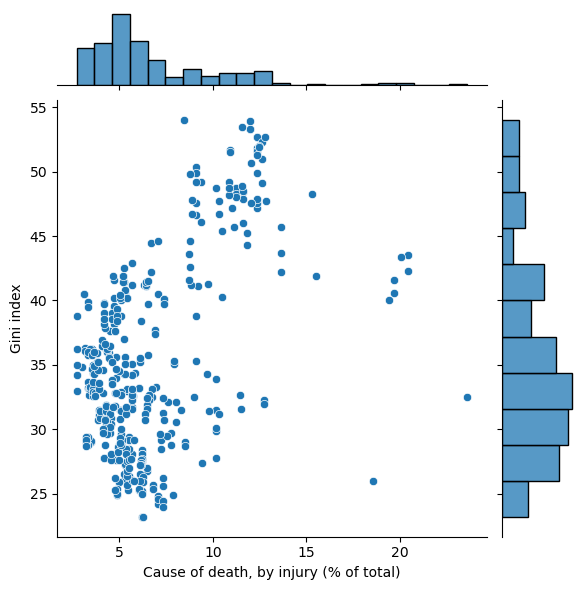

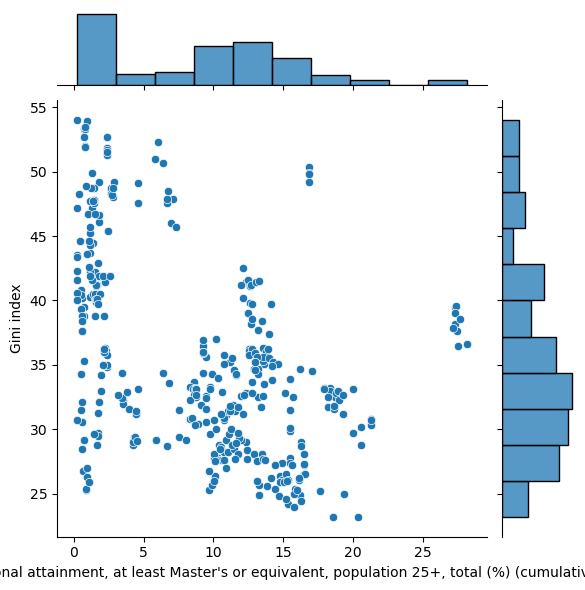

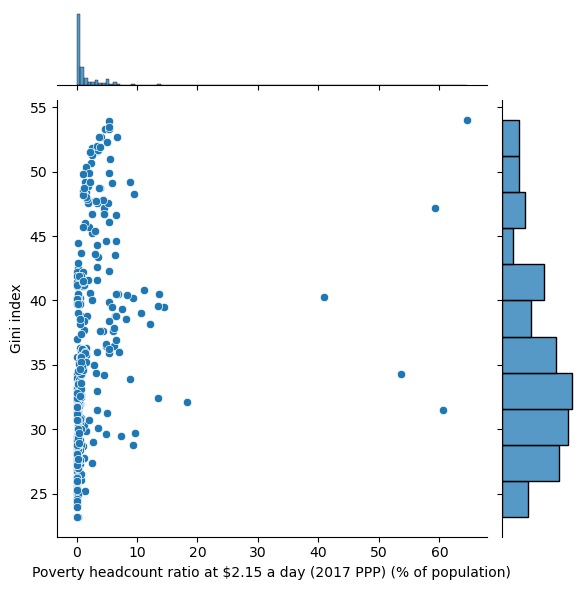

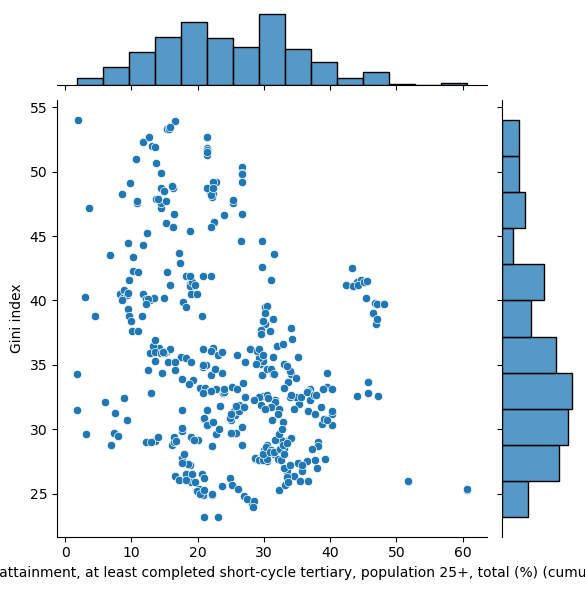

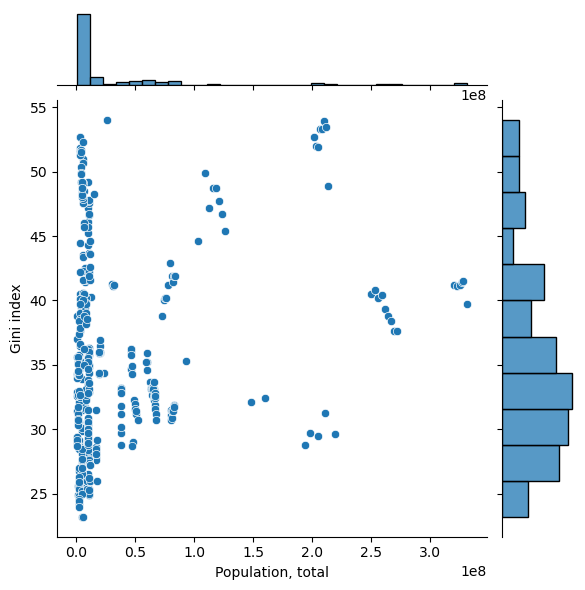

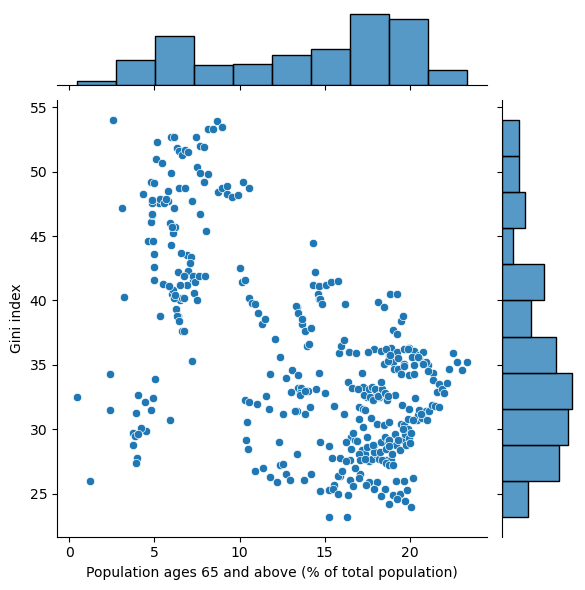

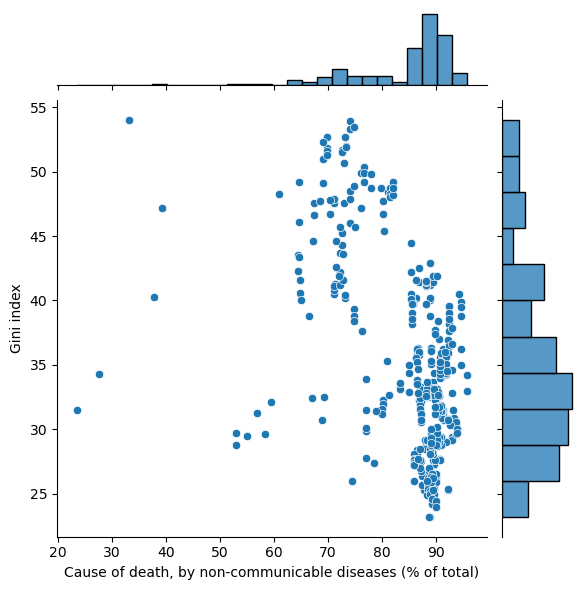

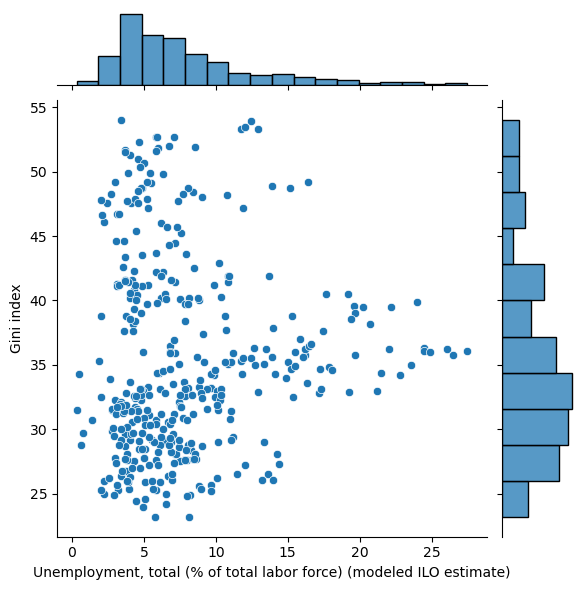

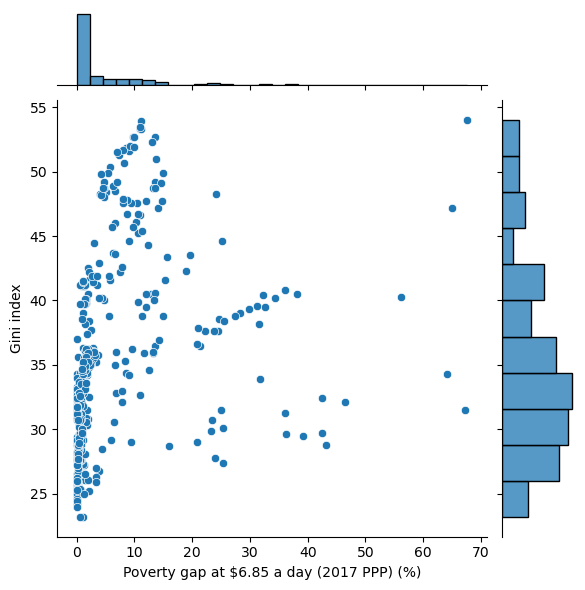

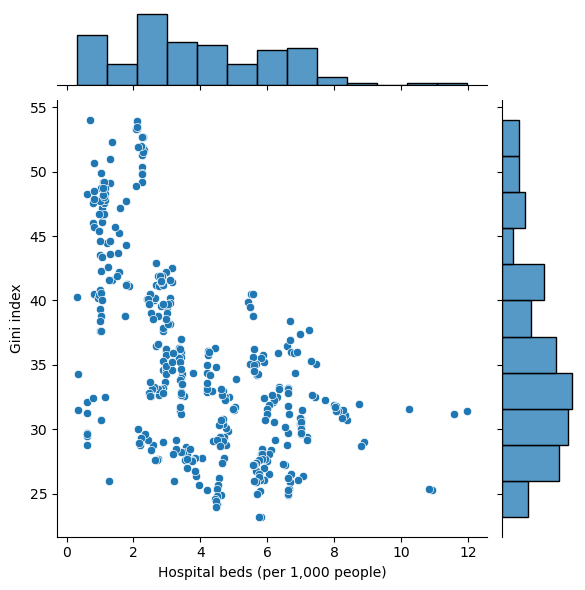

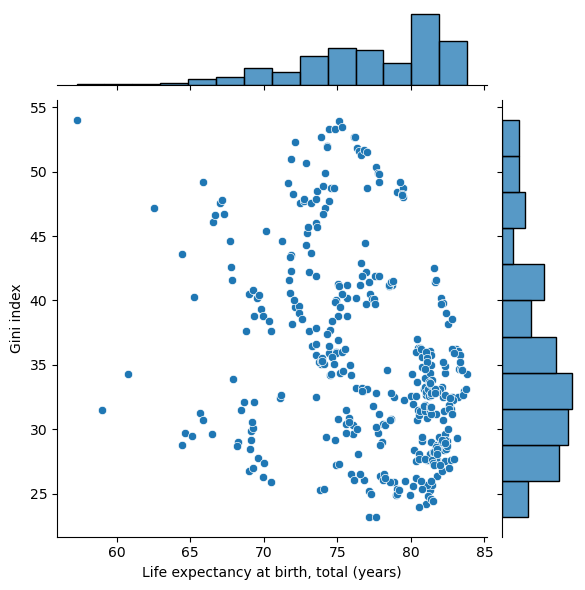

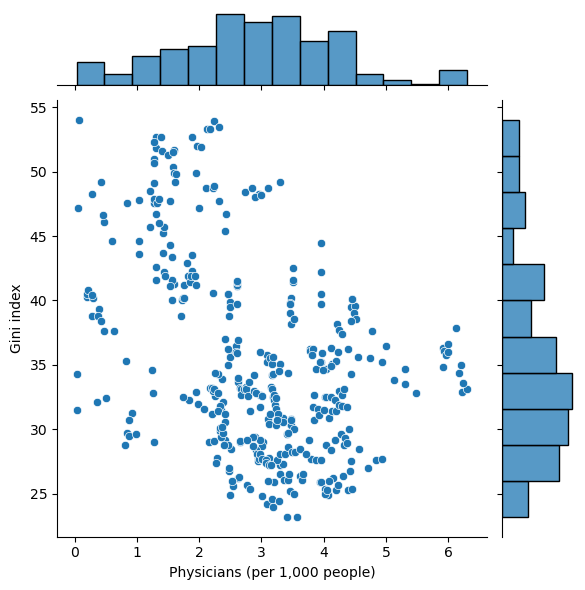

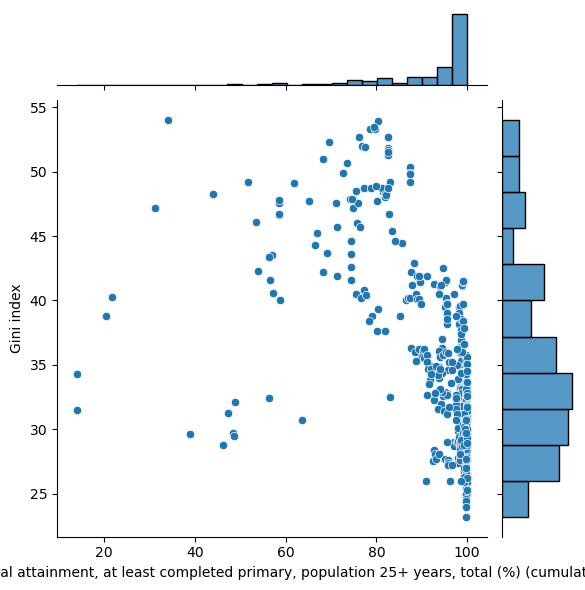

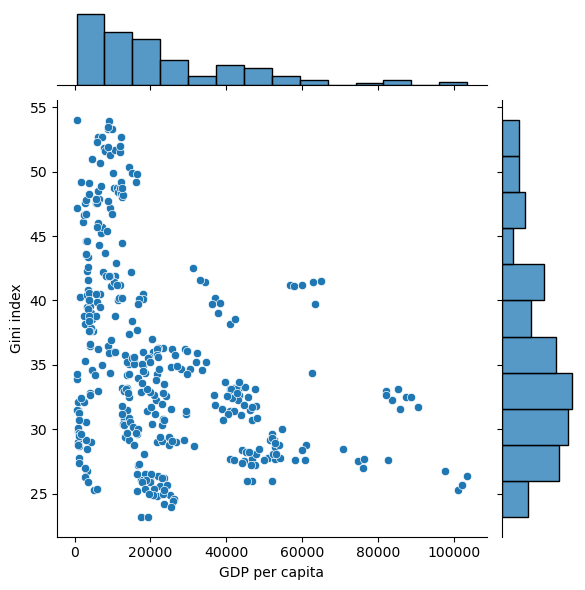

In [5]:
for col in df.columns:
    if col == 'Year':
        ax = sns.barplot(data=df,x=col,y='Gini index')
        plt.setp(ax.get_xticklabels(), rotation=45)
        plt.show()
    elif col == 'Gini index':
        sns.histplot(df[col]) 
    elif col != 'Country Name':
        sns.jointplot(data=df, x=col,y='Gini index')
        plt.show()

* correlations are at  *<span style='color:green;'>reports/figures/edacorr.xlsx</span>*
* Looking at the distributions and correlations it seems that the following features all have a similar strong negative relationship with gini index:
    * Hospital beds (per 1,000 people)
    * GDP per capita
    * Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)
    * Educational attainment, Doctoral or equivalent, population 25+, total (%) (cumulative)
* The cause of death features both injury and non-communicable diseases also might be important features
* The poverty features are all mildly positively correlated with gini, heavily skewed right, and heavily correlated with each other
* Since the goal of this project is explanatory and not predictive, I'm going to now focus on removing multicollinearity so the effects of each feature can be seen seperately 

I'm going to start by using PCA to condense the poverty features

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
poverty = [col for col in df.columns if 'Poverty' in col]

poverty_pca = PCA().fit(scale(df[poverty]))

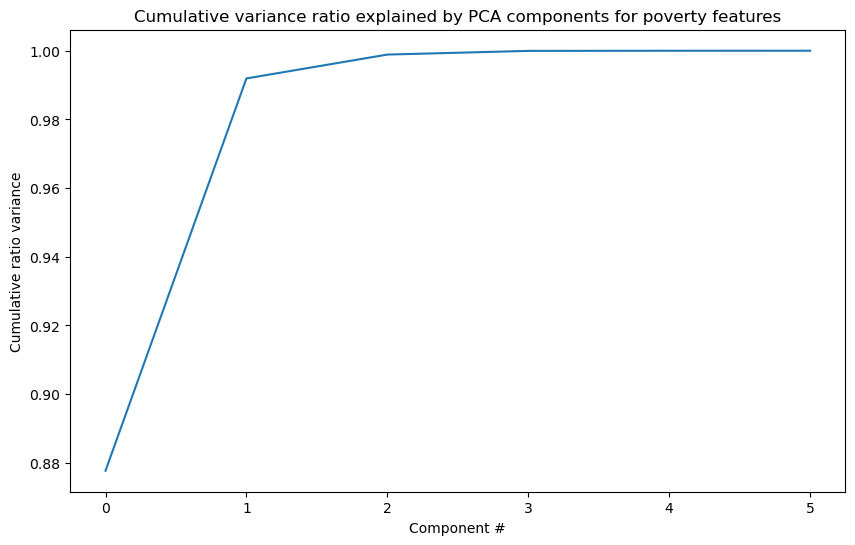

In [7]:
plt.subplots(figsize=(10, 6))
plt.plot(poverty_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for poverty features');

In [8]:
pd.DataFrame(poverty_pca.components_, columns=poverty)

,Poverty headcount ratio at $3.65 a day (2017 PPP) (% of population),Poverty headcount ratio at $6.85 a day (2017 PPP) (% of population),Poverty gap at $2.15 a day (2017 PPP) (%),Poverty gap at $3.65 a day (2017 PPP) (%),Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),Poverty gap at $6.85 a day (2017 PPP) (%)
0,0.426287,0.375207,0.381395,0.430463,0.413010,0.419716
1,-0.205886,-0.597913,0.567385,0.176990,0.376608,-0.324078
2,-0.562645,0.562026,0.535469,-0.249967,-0.131718,-0.031573
3,-0.344028,0.243923,-0.457377,-0.038831,0.764284,-0.165273
4,-0.021179,-0.300573,0.085658,-0.654323,0.243616,0.643726
5,-0.583539,-0.189746,-0.171326,0.539673,-0.163590,0.525469


* All most all of the variance can be explained by the first 2 components
* The first component which accounts for 88% of the variance is very similar to just taking an average of all the poverty features and scaling by 0.4
* The second component, although it only represents 12% of the variance, is more interesting. It sees great negative representation from features at $6.85/day, great positive representation from features at $2.15/day, and close to zero with $3.65/day
* Next I'm going to look at the distribution and relationship of the second component

In [9]:
poverty_pca_x = poverty_pca.transform(scale(df[poverty]))
poverty_pca_x.shape

(384, 6)

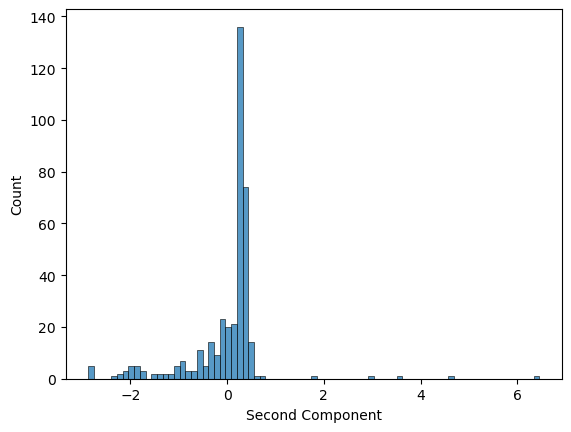

In [10]:
sns.histplot(poverty_pca_x[:,1])
plt.xlabel('Second Component');

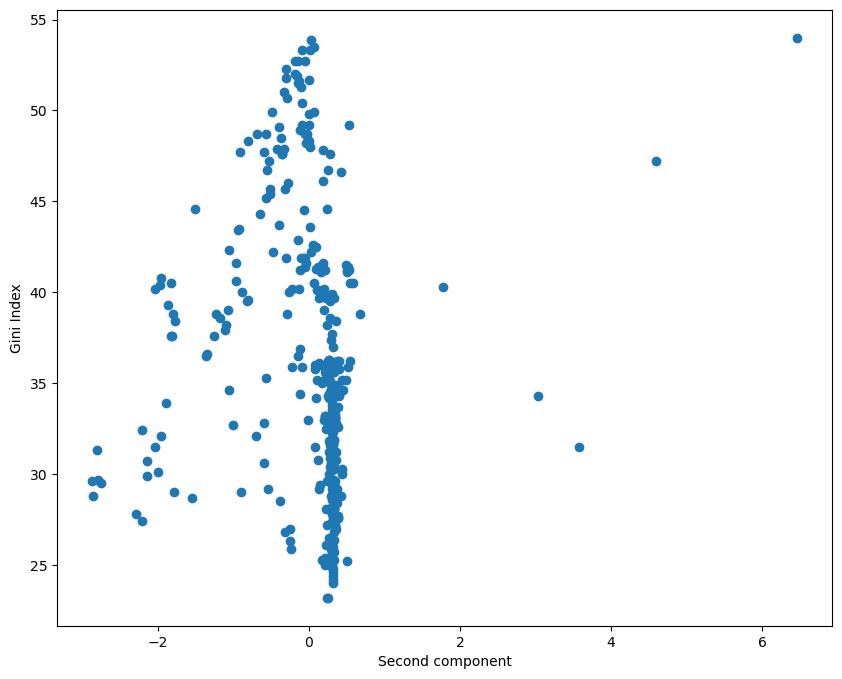

In [11]:
x = poverty_pca_x[:, 1]
y = df['Gini index']
#state = state_summary_index
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('Second component')
plt.ylabel('Gini Index');

* It seems like the second component measures the severity of poverty
* If the second component is positive, there's more people at the $2.15 level than at $6.85 and vice versa if negative.
* Although I don't see a any clear patterns in its relationship with Gini Index, I'll keep it as it might have insightful interactions with other features

In [12]:
df['poverty_pca0'] = poverty_pca_x[:, 0]
df['poverty_pca1'] = poverty_pca_x[:, 1]

df[poverty].to_csv('../data/interim/poverty_features.csv')
df = df.drop(poverty,axis=1)


Next, I'm going to use Variable Inflation Factor to measure multicollinearity
- I'll remove enough so that the Highest VIF is 5

In [13]:
from sklearn.linear_model import LinearRegression

features = df.drop(['Gini index','Country Name'],axis=1).columns.to_list()

def VIFs(features):
    VIFsd = {}
    for f in features:
        X = df[features].drop(f,axis=1)
        y = df[f]

        model = LinearRegression()
        model.fit(X,y)
        VIFsd[f] = 1/(1 - model.score(X,y))

    return pd.Series(VIFsd).sort_values(ascending=False)

VIFs(features)


Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)           15.455327
Cause of death, by non-communicable diseases (% of total)                                                  14.094869
Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)         11.006638
Population ages 65 and above (% of total population)                                                        7.618228
Life expectancy at birth, total (years)                                                                     7.085633
poverty_pca0                                                                                                5.660961
GDP per capita                                                                                              4.903818
Population, total                                                                                           4.434867
Physicians (per 1,000 people)                                   

* Right now, there's 5 factors with VIFs that are too high
* After looking at the correlations, I determined that the top 3 are all highly correlated with each other and decided to only keep one
* I decided to keep 'Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)' as it had the lowest vif and the strongest correlation with gini index

In [14]:
VIFs(df.drop(['Gini index','Country Name','Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)','Cause of death, by non-communicable diseases (% of total)'],axis=1).columns.to_list())

Population ages 65 and above (% of total population)                                                       7.076522
Life expectancy at birth, total (years)                                                                    5.864322
Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)         4.912049
GDP per capita                                                                                             4.641631
Population, total                                                                                          4.099680
poverty_pca0                                                                                               3.819007
Physicians (per 1,000 people)                                                                              3.787731
GDP (current US$)                                                                                          3.185549
Hospital beds (per 1,000 people)                                        

* Although Life expectancy and Population are both correlated with each other, removing one does not lower the other VIF below 5

In [15]:
VIFs(df.drop(['Gini index','Country Name','Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)','Cause of death, by non-communicable diseases (% of total)','Population ages 65 and above (% of total population)'],axis=1).columns.to_list())

Life expectancy at birth, total (years)                                                                    5.678401
Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)         4.838463
GDP per capita                                                                                             4.621692
Population, total                                                                                          4.089580
poverty_pca0                                                                                               3.805257
GDP (current US$)                                                                                          3.129192
Physicians (per 1,000 people)                                                                              3.005473
Hospital beds (per 1,000 people)                                                                           2.448174
Educational attainment, Doctoral or equivalent, population 25+, total (%

Life Expectancy is an important enough feature and 5.67 is close enough to 5 so I'll decide to keep it

These are the final features going into the model! I'll redo the principal components so that they're only fit on the training data.

Based on the correlations, I expect the health and education features to be the most significant. In particular
* Cause of death by injury
* Hospital beds per thousand people
* Childhood education indicators

In [16]:
df.drop(['Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)','Cause of death, by non-communicable diseases (% of total)','Population ages 65 and above (% of total population)','poverty_pca0','poverty_pca1'],axis=1).to_csv('../data/interim/selected_features.csv')